In [125]:
# preprocessing
from sklearn import preprocessing

# iteration operations
import itertools

# nlp
import langdetect

import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# word cloud
from wordcloud import WordCloud
# visualization
import matplotlib.pyplot as plt

# algebra
import numpy as np

# dataframing
import pandas as pd

In [28]:
data = pd.read_csv("./data/youtube_dataset.csv")

## 0. About data

 - Data is about **YouTube comments**. It includes video that the comment was posted on, channel of the video, date, amount of likes the video received, etc.
 - In total, there is 7 features and 19300 instances.
 - Dataset was found and downloaded from https://www.kaggle.com/nipunarora8/most-liked-comments-on-youtube


## 1. Examine data

In [29]:
data.head()

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122


In [30]:
data.sample(frac = 1)

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
16910,J Balvin - 6 AM ft. Farruko (Official Video),jbalvinVEVO,UgyehFWI0ieXrSd43ft4AaABAg,Lucas Duarte,Quién diría que 6 años después íbamos a seguir...,2020-06-22T03:36:20Z,163
16313,Miley Cyrus - Wrecking Ball (Official Video),MileyCyrusVEVO,Ugxqv2MWAUZosRRfdoh4AaABAg,Me ow,I remember how close minded people were back i...,2020-08-14T04:22:41Z,480
8709,"Anuel AA, Daddy Yankee, Karol G, Ozuna &amp; J...",Anuel AA,Ugx_auKJlhLnaj9EYnl4AaABAg,Miguel Umaña,QUIEN LA SIGUE ESCUCHANDO AHORA EN CUARENTENA ...,2020-09-07T14:59:10Z,42
14910,French Montana - Unforgettable ft. Swae Lee,FrenchMontanaVEVO,UgwyQX0nV0qYXXlyqwJ4AaABAg,Oliver Bonilla,This song does not get old!!!! Lots of meaning...,2020-08-27T19:04:53Z,29
15121,Shakira - La La La (Brazil 2014) ft. Carlinhos...,shakiraVEVO,UgzqHnzhl0_a6KCfyrJ4AaABAg,letícia valadao,Como saber se tem brasileiros com um só coment...,2020-09-01T23:37:31Z,42
...,...,...,...,...,...,...,...
18717,Enrique Iglesias - El Perdedor (Pop) ft. Marco...,EnriqueIglesiasVEVO,Ugwgm_4gAS_Ml26Tc3t4AaABAg,Globorick,A NADIE LE IMPORTA EN QUÉ AÑO ESTÁS ESCUCHANDO...,2020-09-06T21:23:15Z,13
17181,Shakira - Can&#39;t Remember to Forget You ft....,shakiraVEVO,UgyY01BqPF1zAGeTF0V4AaABAg,Andrian Cudlea,Jesus Crist king of Kings forever,2020-09-07T20:07:35Z,1
18049,Tyga - Taste (Official Video) ft. Offset,TygaVEVO,Ugw47OU7QSnUNYYtATR4AaABAg,Alan quadros,Isso com fone de ouvido é a melhor coisa 💥,2020-09-08T17:08:10Z,0
145,Ed Sheeran - Shape of You [Official Video],Ed Sheeran,Ugx3O79Pevly-xSyBsd4AaABAg,pvra,"Listening to this to remember the old days, wh...",2020-08-27T06:52:16Z,526


In [31]:
# most liked comments
data.sort_values("Likes",ascending=False)

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
5201,Marshmello - Alone (Official Music Video),Marshmello,UgypW6-bk7J6JZJF1954AaABAg,Marshmello,"1,000,000,000 ✅",2018-10-15T19:33:03Z,540334
15805,Eminem - Rap God (Explicit) [Official Video],EminemVEVO,UgjtQw8E3CESxngCoAEC,Goldenightime,Eminem raps faster than my internet connection,2016-08-13T02:15:49Z,438973
5,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzryH8U6Dz_yBmIgEZ4AaABAg,LR ICED WOLF,3.2 Million comments if you find mine your a l...,2020-03-15T21:11:08Z,370547
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3120,Justin Bieber - Baby (Official Music Video) ft...,JustinBieberVEVO,Ugzv_LcinEv-IMMQZZN4AaABAg,Siddhant Dubey,There's 4.6M comments if you find mine then y...,2019-07-20T06:46:38Z,350917
...,...,...,...,...,...,...,...
11089,El Amante - Nicky Jam (Video Oficial) (Álbum ...,NickyJamTV,Ugyndg3MQJbNCdEGZHF4AaABAg,Josthin Cobeña,ME RIO DEL MIEDO,2020-06-28T18:34:13Z,0
11090,El Amante - Nicky Jam (Video Oficial) (Álbum ...,NickyJamTV,Ugz3Wy-qB08sAmy3zqV4AaABAg,Yisela Chaves,this song is beautiful,2020-06-23T22:36:37Z,0
4393,Shawn Mendes - Treat You Better,ShawnMendesVEVO,UgzScCcK6uBP92JF6yl4AaABAg,UwU,I make vid using this song and send this to my...,2020-09-08T12:21:43Z,0
11091,El Amante - Nicky Jam (Video Oficial) (Álbum ...,NickyJamTV,UgzZnAQdvpSS7knETiR4AaABAg,Hades Uwu,2017 el mejor año por ahora 🔥,2020-08-18T19:26:01Z,0


## 2. Preprocessing

### 1. Duplicates

In [32]:
# check for duplicates
data['Comment Id'].value_counts()[:10]

UgzQv07rvL1d4LU6VkB4AaABAg    2
UgwUd94u74C21L6hc114AaABAg    2
UgyqQWw05veeO5gmPO94AaABAg    2
UgzonNi0FaMF_tsxWml4AaABAg    2
UgyupsCD7WYForow3jx4AaABAg    2
UgxYrb0SPRFab9xRkF54AaABAg    2
UgxboUBH8_Y-txwJ5294AaABAg    2
Ugz1Qa3hRcPu7yn8K0d4AaABAg    2
UgzZpAhqLRmF0sL9iKN4AaABAg    2
UgyVZZPFkpkHGwooCKV4AaABAg    2
Name: Comment Id, dtype: int64

In [33]:
# remove duplicates
data.drop_duplicates(['Comment Id'], keep='first', inplace=True)

In [34]:
# check result
data['Comment Id'].value_counts()[:10]

UgwpWbPHqXRr4gtQOs14AaABAg    1
Ugy_n7IZoqKAN7x8PxJ4AaABAg    1
Ugx7wkbZpbL0OY9EB5Z4AaABAg    1
UggaCcTbPAkwmXgCoAEC          1
UgzO5pxGP1dO1sRGlR14AaABAg    1
UgzKDQlUhLEyi_vZ3Vl4AaABAg    1
UgziSAoUUjeEwP_cpCx4AaABAg    1
Ugw6b6EchfAjOWoRCcl4AaABAg    1
UgwXDdaF7oFzv0Pu6ZF4AaABAg    1
Ugw9VMHeMz_qiZwLvzB4AaABAg    1
Name: Comment Id, dtype: int64

### 2. Standardization

Let's create a new feature that shows the like count as **like score**. The scale in likes is quite large. 

Let's try different standardization methods:

In [35]:
# 1. Z-score standardization: x - µ / sigma
y = data[['Likes']]
like_score_z_score = preprocessing.StandardScaler().fit_transform(y)

In [36]:
# Examine results
print(like_score_z_score)
print(max(like_score_z_score), min(like_score_z_score))

[[ 8.13349356]
 [-0.1156597 ]
 [29.94361958]
 ...
 [-0.18063298]
 [-0.18071758]
 [-0.18080218]]
[45.53153875] [-0.18105598]


In [37]:
# 2. Logarithmic standardization, apply logarithm for every value.
y_not_zero = data['Likes'].apply(lambda x: x + 1e-10)  # so that x > 0 for all x.

In [38]:
like_score_log = np.log(y_not_zero)

In [39]:
print(like_score_log)
print(max(like_score_log), min(like_score_log))

0        11.495576
1         6.650279
2        12.782914
3         2.564949
4         4.804021
           ...    
19295     8.534444
19296     1.791759
19297     1.609438
19298     1.386294
19299     1.098612
Name: Likes, Length: 19121, dtype: float64
13.199942745855235 -23.025850929940457


In [40]:
# 3. Min-max-scaling, scales values between 0 and 1.
like_score_minmax = preprocessing.MinMaxScaler().fit_transform(y)

In [41]:
print(like_score_minmax)
print(max(like_score_minmax), min(like_score_minmax))

[[1.81887499e-01]
 [1.43059663e-03]
 [6.59001655e-01]
 ...
 [9.25353578e-06]
 [7.40282862e-06]
 [5.55212147e-06]]
[1.] [0.]


Let's use these three "like scores" as ground truths and examine on the way how does the standardization affect our results.

### 3. Language detection

A problem: The comments are written in multiple different languages. Later, when extracting patterns from comments, multiple languages might bring problems. For example Japanese and Korean languages don't write spaces. Detecting words is hence challenging with the same logic than with for example English. 

So, let's try to detect the language of the comments with tools available, and examine the results.

Let's try library called **langdetect**, which has a support for 55 languages. It is not perfect, and especially short/single word sentences causes trouble for it. We don't have ground truths for languages, but let's take a random sample of 100 and examine manually how the library succeeds.

In [42]:
comments = data.sample(n=100, random_state=1)['Comment'].values
for c in comments:
    print(c)
    try:
        print(langdetect.detect(c))
    except:
        pass

Mi novia me dejo por que decía que me gusta mucho el reggaetón 
Pero volverá, para seducirme otra vez, besarme otra vez volverme a poner el mundo al revés. 🤷🏿‍♂️
es
Yes Mari and Keone!!!!!!!!!
en
jajaja ches mancos yo desde chiquita yo sabía que la morena era la Taylor
es
I've counted too many stars, now I'm an astronomer.
en
Found out I’m twice this guy’s age but I still can’t help but wanna play it
en
WALKERS TOGETHER AND FOREVER 😎😎😎TAKE ME THROUGH THE NIGHT FALL INTO THE DARKSIDE WE DON'T NEED THE LIGHT WERE LIVE ON THE DARK SIDE
en
Do you recall, not long ago
We would walk on the sidewalk
Innocent, remember?
All we did was care for each other

But the night was warm
We were bold and young
All around the wind blows
We would only hold on to let go

Blow a kiss, fire a gun
We need someone to lean on
Blow a kiss, fire a gun
All we need is somebody to lean on

Blow a kiss, fire a gun
We need someone to lean on
Blow a kiss, fire a gun
All we need is somebody to lean on

What will we do w

We can see that from this sample that
1. Most of the comments are in English.
2. Further, most of the languages are correctly detected (I spotted three mistakes).

Dominance of English in this sample means that we cannot examine well enough how does the detection work for other languages (except maybe Spanish and Portugease). To play it safer, let's use only the comments which are detected as English.

In [43]:
def detect_lang(comment: str):
    """
    Embed try / except syntax for detecting languages.
    """
    
    try:
        return langdetect.detect(comment)
    except:
        return comment

# apply detection for each comment
lang = data['Comment'].apply(detect_lang)
data['Language'] = lang

In [44]:
print(lang)
print("Number of English comments:", len(lang[lang=='en']))
print("% of total number of comments: ", (len(lang[lang=='en']) / len(data)) * 100)

0        en
1        en
2        en
3        en
4        en
         ..
19295    en
19296    en
19297    en
19298    en
19299    es
Name: Comment, Length: 19121, dtype: object
Number of English comments: 13217
% of total number of comments:  69.12295382040689


Let's extract the English comments.

In [50]:
data_en = data[data['Language'] == 'en'].copy()
data_en.head(20)

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes,Language
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280,en
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773,en
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081,en
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13,en
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122,en
6,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzPg7VsuRTwJf77jch4AaABAg,lucas tehe12,claim your “here before 7 billion” tickets her...,2020-09-08T06:01:36Z,763,en
7,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugw61yKNdyVJ5T4R_sN4AaABAg,MemeDille,The ones who are NOT from Tik-Tok can like thi...,2020-09-08T08:44:47Z,94,en
8,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzhueoG3QOV4AbAYAt4AaABAg,Guty Castro soda,Song: spanish\nComments: English\nHotel: trivago,2020-09-09T01:17:50Z,150,en
10,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxcqxyEw2jU7KvhofV4AaABAg,cruisendude,The first viewer must feel like the king of th...,2020-08-21T23:15:01Z,36446,en
11,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugy-CwNxTeLKUuYOXdF4AaABAg,Pls HeLP Me reach 100 SUBscribers,Just imagine how many people's come here every...,2020-09-09T05:43:47Z,142,en


## 3. NLP

Let's test NLP methods on the data.

In [113]:
comments = data_en['Comment']

In [114]:
# cut comments into sentences
sentences = [sent_tokenize(c) for c in comments]

In [115]:
words = [word_tokenize(c) for c in comments]  # cut comments into words
words[0:3]

[['The',
  'people',
  'who',
  'liked',
  'this',
  'comment',
  'is',
  'officially',
  'before',
  '7B',
  'views'],
 ['-', 'Wait', ',', 'it', "'s", '7B', 'views', '-', 'Always', 'has', 'been'],
 ['*',
  'Teacher',
  ':',
  'What',
  'is',
  'the',
  'population',
  'of',
  'the',
  'Earth',
  '?',
  '*',
  '*',
  'Me',
  ':',
  'Around',
  'one',
  'Despacito',
  '*']]

### 1. Frequent words

In [116]:
words_all = [w.lower() for w in list(itertools.chain.from_iterable(words)) ] # set words to lowercase and combine all words together into one list.
fdist = FreqDist(words_all)  # count frequencies
fdist.most_common(10)  # list 10 most common words and counts

[(',', 13239),
 ('i', 12303),
 ('the', 9948),
 ('you', 9093),
 ('this', 8002),
 ('.', 7369),
 (':', 7278),
 ('to', 6635),
 ('and', 5625),
 ('a', 5142)]

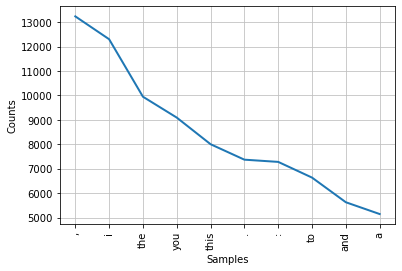

In [117]:
fdist.plot(10)

### 2. Remove punctuation marks

For knowledge discovery, punctuation marks are not very useful. Let's remove them from data.

In [118]:
words_no_punc = [w for w in words_all if w.isalpha()]

In [119]:
print(len(words_all), len(words_no_punc))

395101 319381


Punctuation marks removed.

In [120]:
fdist = FreqDist(words_no_punc)
fdist.most_common(10)

[('i', 12303),
 ('the', 9948),
 ('you', 9093),
 ('this', 8002),
 ('to', 6635),
 ('and', 5625),
 ('a', 5142),
 ('is', 4315),
 ('in', 4291),
 ('it', 4208)]

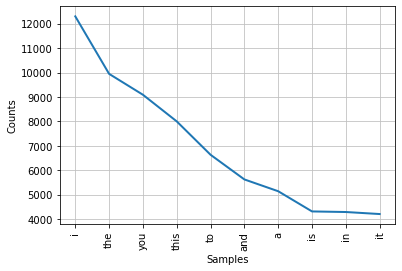

In [121]:
fdist.plot(10)

### 3. Remove stopwords

Words such as 'and', 'but' and 'so' are also not very informative in relation to the content of the comments. Hence, let's remove them as well.

In [126]:
sw = stopwords.words("english")  # english language stopwords
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [128]:
words_no_stopwords = [w for w in words_no_punc if w not in sw]  # exlude stopwords
print(len(words_no_punc), len(words_no_stopwords))

319381 164610


### 4. Final frequency distribution

In [129]:
fdist = FreqDist(words_no_stopwords)
fdist.most_common(10)

[('song', 3755),
 ('like', 2527),
 ('love', 1720),
 ('people', 1631),
 ('know', 1567),
 ('oh', 1563),
 ('years', 1408),
 ('rip', 1317),
 ('one', 1281),
 ('still', 1100)]

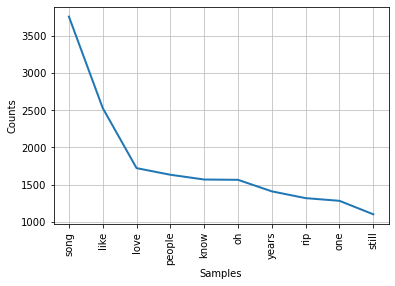

In [130]:
fdist.plot(10)

### 5. WordCloud

Let's generate a WordCloud to visualize the frequent words.

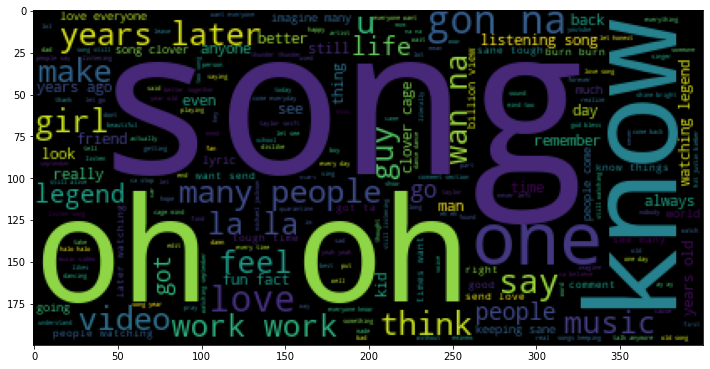

In [131]:
wc = WordCloud().generate(" ".join(words_no_stopwords))
plt.figure(figsize = (12, 12))
plt.imshow(wc)

In [ ]:
 from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer() #Convert a collection of text documents to a matrix of token counts
X = vectorizer.fit_transform(comment)

In [ ]:
feature_names = vectorizer.get_feature_names()
feature_names

In [ ]:
data = X.toarray()   
data